<a href="https://colab.research.google.com/github/watts57/Python/blob/master/Covid_19_US_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fbprophet


Confirmed Covid-19 statistics, stats from github. Ran Sunday, 4/26. Stats subject to change as information is updated.
**Above: US up to 4/25**
**Below: Italy up to 4/25**

             Date Country  Confirmed  Recovered  Deaths
52716  2020-10-16      US    8028392    3197539  218931
52717  2020-10-17      US    8085465    3220573  219676
52718  2020-10-18      US    8134804    3234138  220104
52719  2020-10-19      US    8201387    3272603  220569
52720  2020-10-20      US    8262326    3295148  221509
52721  2020-10-21      US    8324960    3323354  222627
52722  2020-10-22      US    8397618    3353056  223502
52723  2020-10-23      US    8480161    3375427  224442
52724  2020-10-24      US    8564037    3406656  225382
52725  2020-10-25      US    8625984    3422878  225760
52726  2020-10-26      US    8691979    3460455  226267
52727  2020-10-27      US    8767572    3487666  227242
52728  2020-10-28      US    8845830    3518140  228244
52729  2020-10-29      US    8936033    3554336  229217
52730  2020-10-30      US    9033829    3578452  230235
52731  2020-10-31      US    9122666    3612478  231125
52732  2020-11-01      US    9199122    3630579 

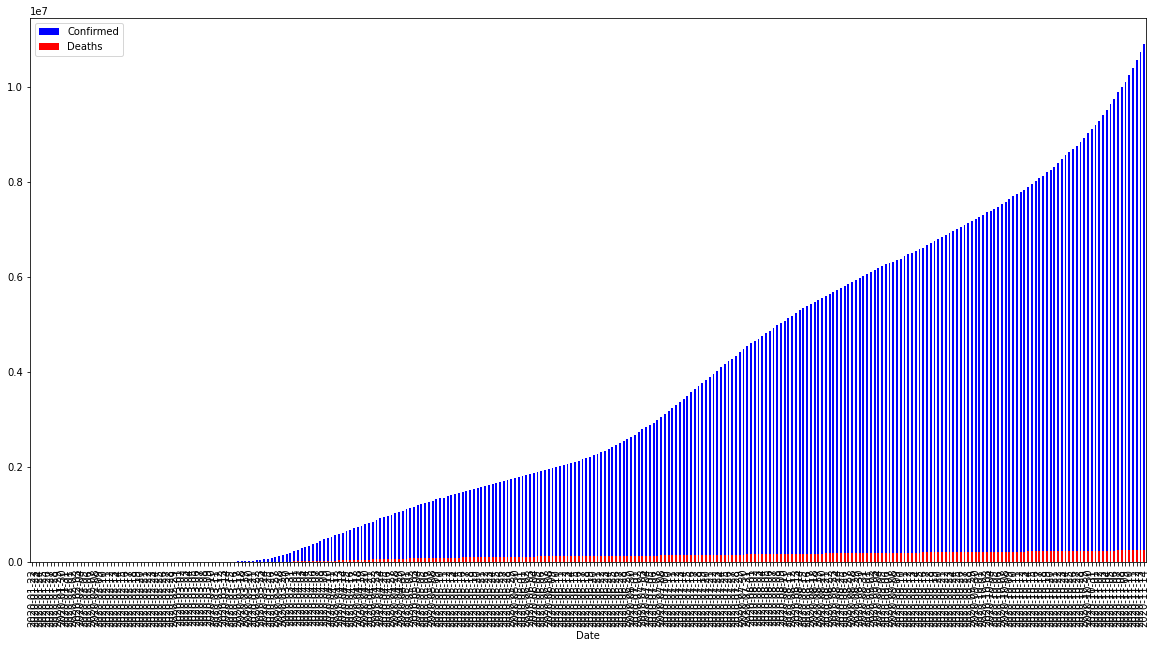

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

#### ----- Step 1 (Download data)----
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df1 = pd.read_csv(URL_DATASET)

df_us = df1[df1['Country']=='US']
print(df_us.tail(30))

#### ----- Step 3 (Plot data)----
# Increase size of plot
plt.rcParams["figure.figsize"]=20,10  # Remove if not on Jupyter
# Plot column 'Confirmed'
df_us.plot(kind = 'bar', x = 'Date', y = 'Confirmed', color = 'blue')

ax1 = plt.gca()
df_us.plot(kind = 'bar', x = 'Date', y = 'Deaths', color = 'red', ax = ax1)
plt.show()

In [ ]:
df_us_per_day = df_us.groupby('Date')[['Confirmed','Recovered','Deaths']].sum()

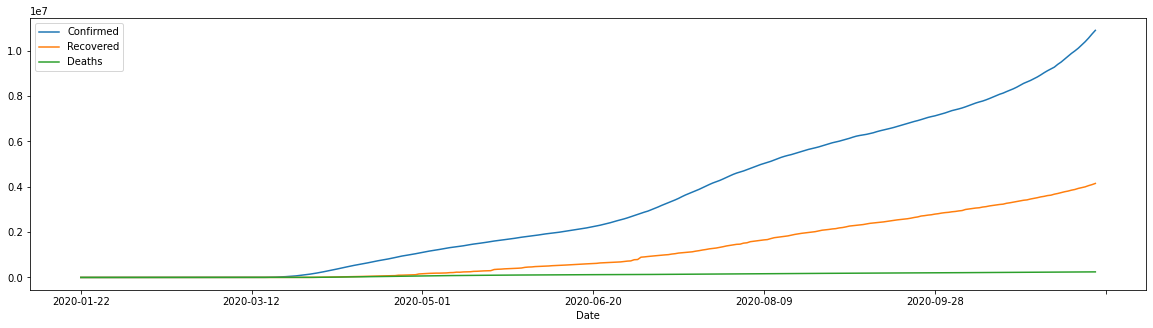

In [ ]:
df_us_per_day.plot(kind='line',figsize=(20,5))

In [ ]:

df_us_per_day

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
2020-01-26,5,0,0
...,...,...,...
2020-11-10,10256094,3961873,240589
2020-11-11,10399325,3997175,241977
2020-11-12,10560111,4051256,243194


In [ ]:
us_cases = df_us_per_day.reset_index()


In [ ]:
confirmed_cases = us_cases[['Date','Confirmed']]
recovered_cases = us_cases[['Date','Recovered']]
death_cases = us_cases[['Date','Deaths']]

columns must be named ds and y
So don't touch below code


In [ ]:
death_cases.rename(columns={'Date':'ds','Deaths':'y'},inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = death_cases[:270]
test = death_cases[270:]


train.tail()

In [ ]:

from fbprophet import Prophet
m= Prophet()

train = death_cases[:154]
test = death_cases[154:]
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m.fit(train)
future_dates = m.make_future_dataframe(periods=180)


future = future_dates


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


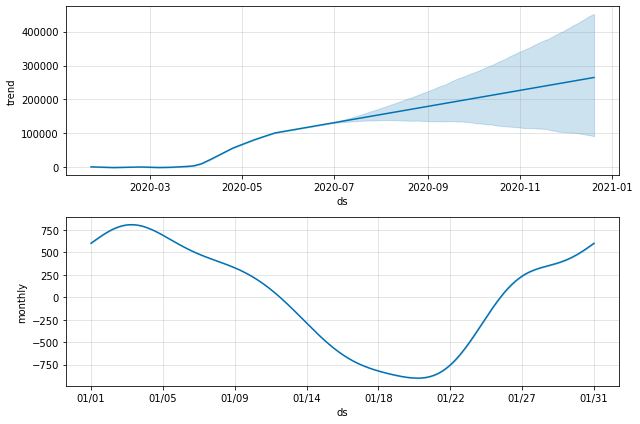

In [ ]:
df = death_cases
forecast = m.predict(future)
fig = m.plot_components(forecast)

Text(41.375, 0.5, 'Deaths from Covid-19')

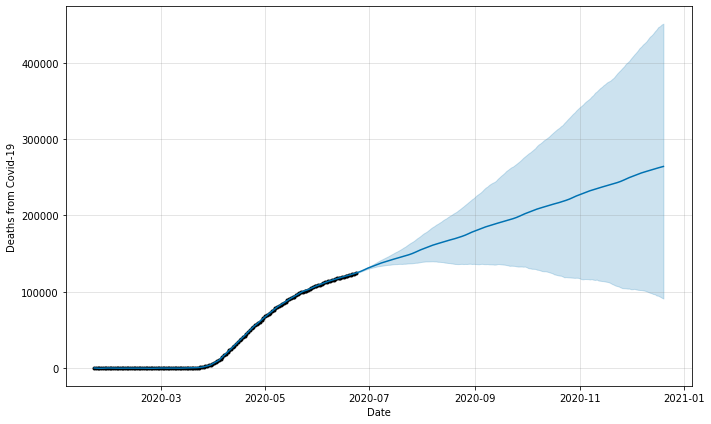

In [ ]:
import matplotlib.pyplot as plt

m.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Deaths from Covid-19')


In [ ]:
df_us

,Date,Country,Confirmed,Recovered,Deaths
52448,2020-01-22,US,1,0,0
52449,2020-01-23,US,1,0,0
52450,2020-01-24,US,2,0,0
52451,2020-01-25,US,2,0,0
52452,2020-01-26,US,5,0,0
...,...,...,...,...,...
52741,2020-11-10,US,10256094,3961873,240589
52742,2020-11-11,US,10399325,3997175,241977
52743,2020-11-12,US,10560111,4051256,243194
52744,2020-11-13,US,10737335,4095146,244332


In [ ]:

forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,1046.524878,-96.249190,504.229014,1046.524878,1046.524878,-849.597932,-849.597932,-849.597932,-849.597932,-849.597932,-849.597932,0.0,0.0,0.0,196.926946
1,2020-01-23,910.006192,-272.510832,319.845889,910.006192,910.006192,-887.979481,-887.979481,-887.979481,-887.979481,-887.979481,-887.979481,0.0,0.0,0.0,22.026710
2,2020-01-24,773.487505,-409.430144,187.317206,773.487505,773.487505,-900.111047,-900.111047,-900.111047,-900.111047,-900.111047,-900.111047,0.0,0.0,0.0,-126.623542
3,2020-01-25,636.968818,-519.189755,74.386627,636.968818,636.968818,-853.440766,-853.440766,-853.440766,-853.440766,-853.440766,-853.440766,0.0,0.0,0.0,-216.471947
4,2020-01-26,500.450132,-539.983232,99.257133,500.450132,500.450132,-716.556560,-716.556560,-716.556560,-716.556560,-716.556560,-716.556560,0.0,0.0,0.0,-216.106429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2020-12-16,261718.653155,95154.527705,443542.497573,95261.968632,443754.214532,-5.661193,-5.661193,-5.661193,-5.661193,-5.661193,-5.661193,0.0,0.0,0.0,261712.991962
330,2020-12-17,262493.605949,94799.849772,446672.612403,95119.431143,446576.601121,-180.942706,-180.942706,-180.942706,-180.942706,-180.942706,-180.942706,0.0,0.0,0.0,262312.663242
331,2020-12-18,263268.558742,93592.667889,447905.763554,93886.001052,448454.630650,-364.530650,-364.530650,-364.530650,-364.530650,-364.530650,-364.530650,0.0,0.0,0.0,262904.028091
332,2020-12-19,264043.511535,92275.891122,450082.667700,92708.130196,450231.060085,-533.530735,-533.530735,-533.530735,-533.530735,-533.530735,-533.530735,0.0,0.0,0.0,263509.980800


In [ ]:
forecast.tail

<bound method NDFrame.tail of             ds          trend  ...  multiplicative_terms_upper           yhat
0   2020-01-22    1046.524878  ...                         0.0     196.926946
1   2020-01-23     910.006192  ...                         0.0      22.026710
2   2020-01-24     773.487505  ...                         0.0    -126.623542
3   2020-01-25     636.968818  ...                         0.0    -216.471947
4   2020-01-26     500.450132  ...                         0.0    -216.106429
..         ...            ...  ...                         ...            ...
329 2020-12-16  261718.653155  ...                         0.0  261712.991962
330 2020-12-17  262493.605949  ...                         0.0  262312.663242
331 2020-12-18  263268.558742  ...                         0.0  262904.028091
332 2020-12-19  264043.511535  ...                         0.0  263509.980800
333 2020-12-20  264818.464328  ...                         0.0  264150.202018

[334 rows x 16 columns]>

In [ ]:
forecast[210:240]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
210,2020-08-19,169499.270761,136862.275780,202215.221113,137374.945612,202816.646225,-533.530735,-533.530735,-533.530735,-533.530735,-533.530735,-533.530735,0.0,0.0,0.0,168965.740026
211,2020-08-20,170274.223554,136446.115266,203515.955793,137119.113977,204444.420635,-668.262310,-668.262310,-668.262310,-668.262310,-668.262310,-668.262310,0.0,0.0,0.0,169605.961244
212,2020-08-21,171049.176347,136368.273718,204803.955596,137135.644040,205498.603613,-762.366857,-762.366857,-762.366857,-762.366857,-762.366857,-762.366857,0.0,0.0,0.0,170286.809490
213,2020-08-22,171824.129141,136273.437987,206621.222503,137164.918355,207239.000495,-825.200675,-825.200675,-825.200675,-825.200675,-825.200675,-825.200675,0.0,0.0,0.0,170998.928465
214,2020-08-23,172599.081934,136418.260542,208265.445272,137372.013324,209001.132554,-870.732960,-870.732960,-870.732960,-870.732960,-870.732960,-870.732960,0.0,0.0,0.0,171728.348974
215,2020-08-24,173374.034727,136576.188841,210037.836858,137452.081662,210835.521721,-899.038136,-899.038136,-899.038136,-899.038136,-899.038136,-899.038136,0.0,0.0,0.0,172474.996591
216,2020-08-25,174148.987520,136317.669722,211798.553091,137530.452802,212439.941051,-886.484791,-886.484791,-886.484791,-886.484791,-886.484791,-886.484791,0.0,0.0,0.0,173262.502730
217,2020-08-26,174923.940314,136478.128455,213694.323573,137417.241378,214380.047256,-797.325293,-797.325293,-797.325293,-797.325293,-797.325293,-797.325293,0.0,0.0,0.0,174126.615021
218,2020-08-27,175698.893107,136361.498394,215443.352912,137265.583839,216143.148708,-612.337827,-612.337827,-612.337827,-612.337827,-612.337827,-612.337827,0.0,0.0,0.0,175086.555280
219,2020-08-28,176473.845900,136662.459594,217392.139731,137007.735858,217677.239063,-353.119808,-353.119808,-353.119808,-353.119808,-353.119808,-353.119808,0.0,0.0,0.0,176120.726092
